### Result visualization
Plot train/test loss/acc of different training with several optimizer

In [54]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
import pickle
import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)

In [56]:
import os
import pickle
import torch
import matplotlib.pyplot as plt
from path import TRAIN_HISTORY_DIR, FIGURE_DIR

In [57]:
filenames = os.listdir(TRAIN_HISTORY_DIR)
filenames

['atmo_100epochs_MNIST.pickle', 'dynamicAtmo_100epochs_MNIST.pickle']

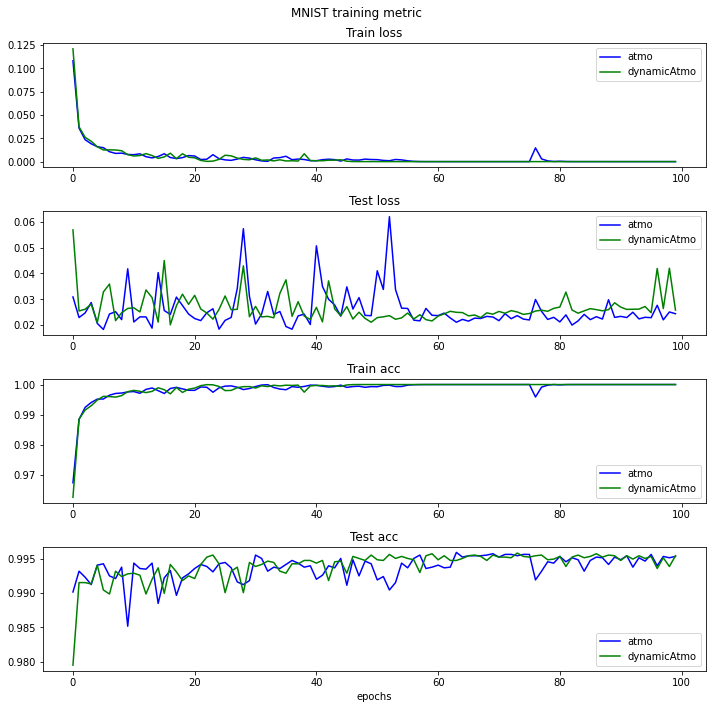

In [58]:
# MNIST metric plot
figure, axis = plt.subplots(4, 1, figsize=(10,10))
color = ["b", "g", "r", "y", "c", "m", "k", "lime", "orange", "gray"]
time_epoch= dict()
i=0
for filename in filenames:
  if filename.find("MNIST") != -1:
    with open(os.path.join(TRAIN_HISTORY_DIR, filename),'rb') as file:
       history = CPU_Unpickler(file).load()
    train_loss = history["train_loss"]  
    test_loss = history["test_loss"]
    for a, loss in enumerate(train_loss):
          train_loss[a] = loss.item()
    for a, loss in enumerate(test_loss):
          test_loss[a] = loss.item()
    train_acc = history["train_acc"]
    test_acc = history["test_acc"]
    axis[0].plot(train_loss, color[i], label=history["optimizer"])
    axis[1].plot(test_loss, color[i], label=history["optimizer"]) 
    axis[2].plot(train_acc, color[i], label=history["optimizer"]) 
    axis[3].plot(test_acc, color[i], label=history["optimizer"])
    time_epoch[history["optimizer"]] = history["time_epoch"]
    i = i+1
axis[0].set_title("Train loss")
axis[1].set_title("Test loss") 
axis[2].set_title("Train acc") 
axis[3].set_title("Test acc")
axis[3].set_xlabel("epochs")
axis[0].legend(loc="upper right")
axis[1].legend(loc="upper right")
axis[2].legend(loc="lower right")
axis[3].legend(loc="lower right")
figure.suptitle("MNIST training metric")
figure.tight_layout()
plt.savefig(os.path.join(FIGURE_DIR, 'MNIST_training_metric'))
plt.show()
    



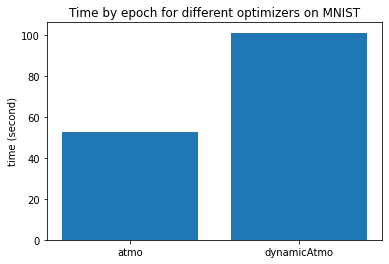

In [59]:
# time by epoch for MNIST
optimizers = []
times = []
for optimizer, time in time_epoch.items():
    optimizers.append(optimizer)
    times.append(time)
plt.bar([i for i in range(len(optimizers))], height=times, tick_label=optimizers)
plt.ylabel("time (second)")
plt.title("Time by epoch for different optimizers on MNIST")
plt.savefig(os.path.join(FIGURE_DIR, 'time_epoch_MNIST'))
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


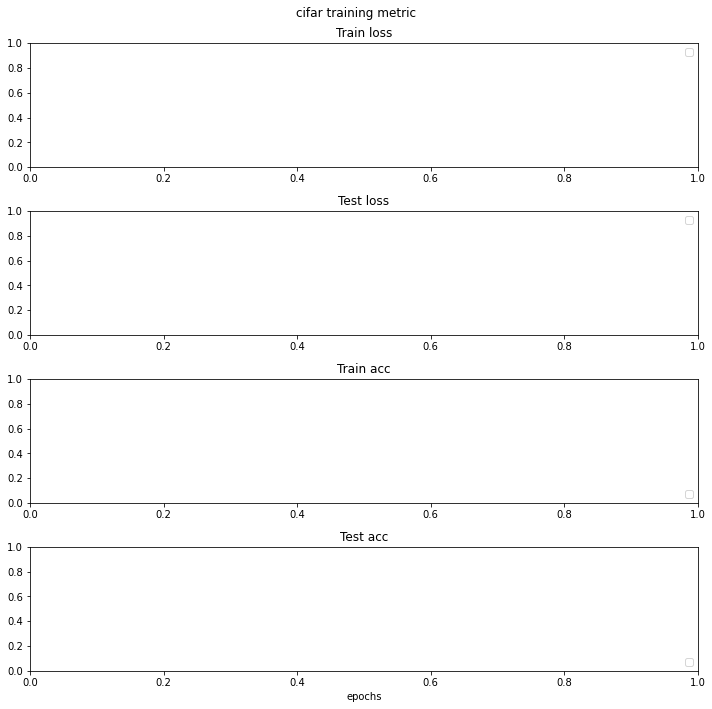

In [60]:
# cifar metric plot
figure, axis = plt.subplots(4, 1, figsize=(10,10))
color = ["b", "g", "r", "y", "c", "m", "k", "lime", "orange", "gray"]
time_epoch= dict()
i=0
for filename in filenames:
  if filename.find("cifar") != -1:
    with open(os.path.join(TRAIN_HISTORY_DIR, filename),'rb') as file:
       history = CPU_Unpickler(file).load()
    train_loss = history["train_loss"]  
    test_loss = history["test_loss"]
    for a, loss in enumerate(train_loss):
          train_loss[a] = loss.item()
    for a, loss in enumerate(test_loss):
          test_loss[a] = loss.item()
    train_acc = history["train_acc"]
    test_acc = history["test_acc"]
    axis[0].plot(train_loss, color[i], label=history["optimizer"])
    axis[1].plot(test_loss, color[i], label=history["optimizer"]) 
    axis[2].plot(train_acc, color[i], label=history["optimizer"]) 
    axis[3].plot(test_acc, color[i], label=history["optimizer"])
    time_epoch[history["optimizer"]] = history["time_epoch"]
    i = i+1
axis[0].set_title("Train loss")
axis[1].set_title("Test loss") 
axis[2].set_title("Train acc") 
axis[3].set_title("Test acc")
axis[3].set_xlabel("epochs")
axis[0].legend(loc="upper right")
axis[1].legend(loc="upper right")
axis[2].legend(loc="lower right")
axis[3].legend(loc="lower right")
figure.suptitle("cifar training metric")
figure.tight_layout()
plt.savefig(os.path.join(FIGURE_DIR, 'cifar_training_metric'))
plt.show()

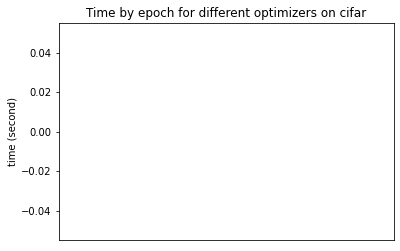

In [61]:
# time by epoch for cifar
optimizers = []
times = []
for optimizer, time in time_epoch.items():
    optimizers.append(optimizer)
    times.append(time)
plt.bar([i for i in range(len(optimizers))], height=times, tick_label=optimizers)
plt.ylabel("time (second)")
plt.title("Time by epoch for different optimizers on cifar")
plt.savefig(os.path.join(FIGURE_DIR, 'time_epoch_cifar'))
plt.show()